In [43]:
import pandas as pd
import numpy as np

gender_pay = pd.read_csv('gender_pay.csv')
gender_pay.dropna(inplace=True)
gender_pay.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0
6,Marketing and sales managers,948,1462.0,570,1603.0,378,1258.0


## Data

The data contains 558 entries of arranged into 7 columns.

All_workers: Number of workers in each occupation category
All_weekly: Weekly wage of all workers by category
M_workers/ F_workers: Number of male/ female workers in each occupation
M_weekly/ F_weekly: Weekly wage of male/ female workers 

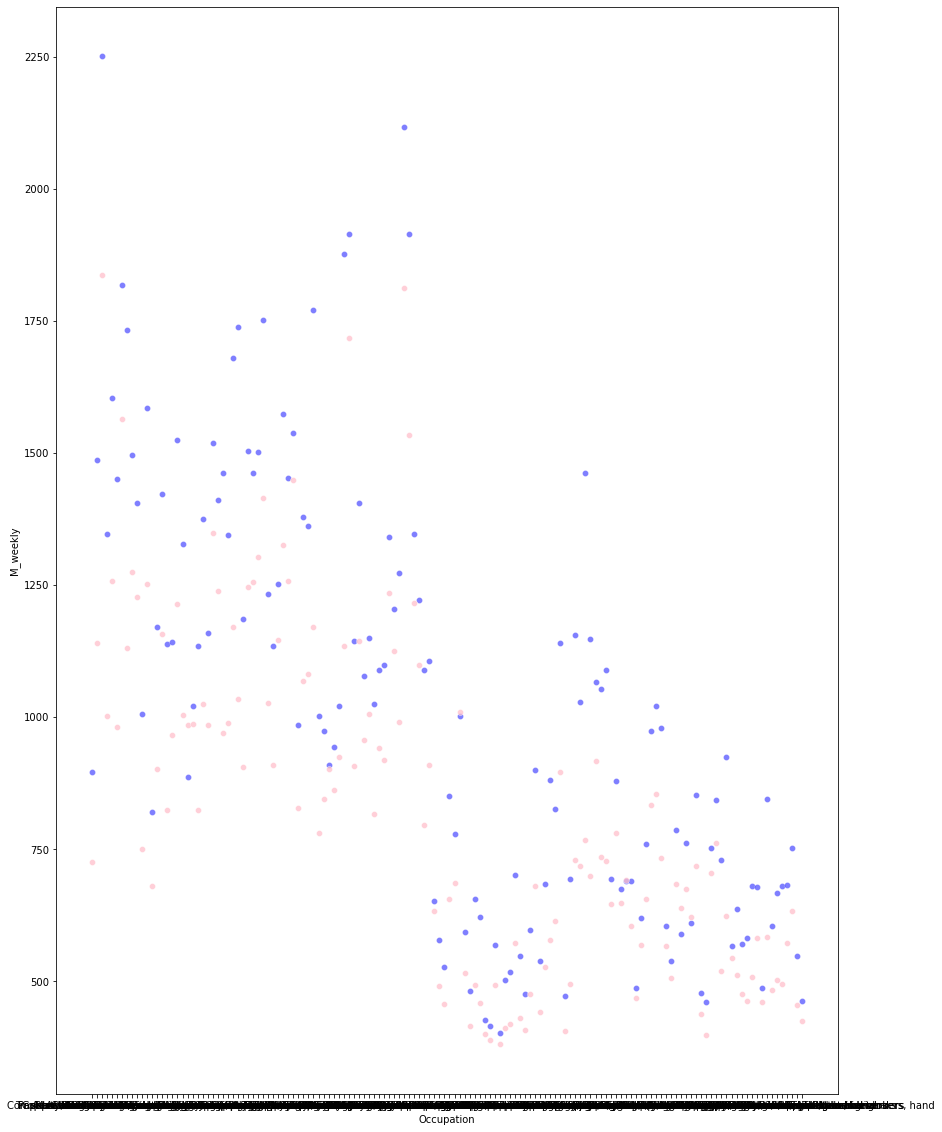

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,20))
sns.scatterplot(data = gender_pay, x = 'Occupation', y = 'M_weekly', color = 'blue', alpha =0.5)
sns.scatterplot(data = gender_pay, x = 'Occupation', y = 'F_weekly', color = 'pink', alpha =0.75)
plt.show()

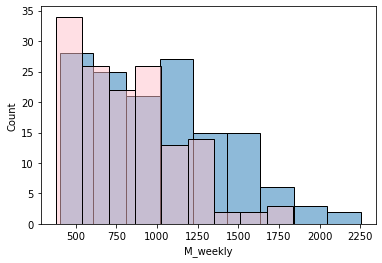

In [45]:
sns.histplot(data = gender_pay, x = 'M_weekly', alpha = 0.5)
sns.histplot(data = gender_pay, x = 'F_weekly', color = 'pink', alpha = 0.5)
plt.show()

### First glance shows a trend of men earning more than women

All the data included in one chart makes the data difficult to analyze. There seems to be a line where women earn the same amount across a fwe occupations.

I intend to examine the data in two ways going foward:

1) look at which occupations where women earn more than men.

2) Using a for loop break down groups of occupations into separate plots

In [46]:
women_higher = gender_pay[gender_pay['F_weekly'] >= gender_pay['M_weekly']]
women_higher.head(10)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
35,"Wholesale and retail buyers, except farm products",142,926.0,73,886.0,69,985.0
228,Police and sheriff's patrol officers,655,1002.0,569,1001.0,86,1009.0
304,"Bookkeeping, accounting, and auditing clerks",769,692.0,87,690.0,682,692.0
340,Data entry keyers,223,619.0,55,589.0,169,638.0
345,"Office clerks, general",929,620.0,156,609.0,773,622.0


### Women earned more than men in five occupations of this data set

The five occupations that women tended to earn more were typically office jobs such as office clerks, accountants and data entry. Women suprisngly edged out men by 8 dollars weekly in the field of of patrol officers.

In general men earn more than men, but does this paint a full picture? This data set is lacking in that it does not account for hours worked or experience

One thing the dataset has that can be usesful in identifying causes is which carriers are more dominated by men and which are more dominated by women. A data frame will be created to break down fields by distribution of male/ female

In [47]:
gender_pay['M:F_Ratio'] = gender_pay['M_workers'] / gender_pay['F_workers']
gender_pay['pay_Ratio'] = gender_pay['M_weekly'] / gender_pay['F_weekly']
gender_pay.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,M:F_Ratio,pay_Ratio
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0,1.256796,1.232782
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0,1.424519,1.304653
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0,2.696113,1.226035
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0,3.074257,1.344311
6,Marketing and sales managers,948,1462.0,570,1603.0,378,1258.0,1.507937,1.274245


<AxesSubplot:xlabel='M:F_Ratio', ylabel='Count'>

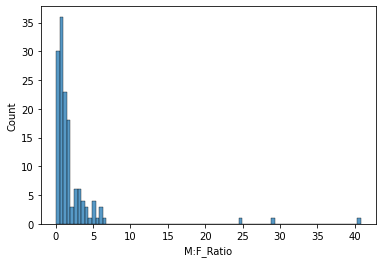

In [48]:
sns.histplot(data = gender_pay, x = 'M:F_Ratio')

Text(0.5, 1.0, 'M/F Ratio vs Pay Ratio')

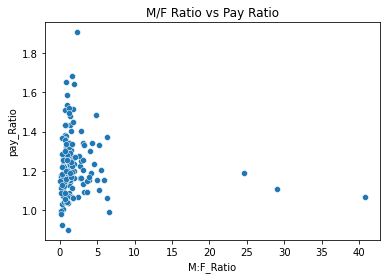

In [49]:
sns.scatterplot(data = gender_pay, x = 'M:F_Ratio', y = 'pay_Ratio' )
plt.title('M/F Ratio vs Pay Ratio')

It is difficult to see any kind of coorelation with oultiers of the male dominated fields such as Construction, Maintenance and drivers.

The data frames are broken down to see which fields have ratios of male to female workers greater than 10, between five and ten, between five and one, and female dominated fields.

In [50]:
outliers = gender_pay[gender_pay['M:F_Ratio'] > 10]
outliers.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,M:F_Ratio,pay_Ratio
360,CONSTRUCTION,5722,749.0,5586,751.0,137,704.0,40.773723,1.066761
401,MAINTENANCE,4301,839.0,4159,842.0,143,761.0,29.083916,1.106439
528,Driver/sales workers and truck drivers,2687,747.0,2582,751.0,105,632.0,24.590476,1.188291


In [51]:
five_ten = gender_pay[(gender_pay['M:F_Ratio'] >= 5) & (gender_pay['M:F_Ratio'] < 10) ]
five_ten.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,M:F_Ratio,pay_Ratio
78,ENGINEERING,2656,1424.0,2272,1452.0,383,1257.0,5.932115,1.155131
96,"Engineers, all other",393,1527.0,339,1537.0,54,1448.0,6.277778,1.061464
130,Clergy,376,1002.0,316,1021.0,60,924.0,5.266667,1.104978
228,Police and sheriff's patrol officers,655,1002.0,569,1001.0,86,1009.0,6.616279,0.992071
237,Chefs and head cooks,340,619.0,285,656.0,55,492.0,5.181818,1.333333


In [52]:
one_five = gender_pay[(gender_pay['M:F_Ratio'] >= 1.0) & (gender_pay['M:F_Ratio'] < 5) ]
one_five.head(66)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,M:F_Ratio,pay_Ratio
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0,1.256796,1.232782
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0,1.424519,1.304653
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0,2.696113,1.226035
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0,3.074257,1.344311
6,Marketing and sales managers,948,1462.0,570,1603.0,378,1258.0,1.507937,1.274245
...,...,...,...,...,...,...,...,...,...
451,"Food processing workers, all other",132,594.0,82,679.0,50,508.0,1.640000,1.336614
472,"Metal workers and plastic workers, all other",351,639.0,278,678.0,72,581.0,3.861111,1.166954
505,"Inspectors, testers, sorters, samplers, and we...",701,710.0,440,844.0,260,583.0,1.692308,1.447684
520,"Production workers, all other",846,625.0,643,666.0,203,501.0,3.167488,1.329341


In [53]:
female_dominated = gender_pay[(gender_pay['M:F_Ratio'] < 1.0)]
female_dominated.head(65)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,M:F_Ratio,pay_Ratio
10,Financial managers,1124,1408.0,551,1732.0,573,1130.0,0.961606,1.532743
12,Human resources managers,254,1365.0,68,1495.0,186,1274.0,0.365591,1.173469
19,Education administrators,778,1423.0,282,1585.0,496,1252.0,0.568548,1.265974
24,Lodging managers,123,985.0,54,1171.0,68,902.0,0.794118,1.298226
25,Medical and health services managers,592,1210.0,154,1422.0,438,1156.0,0.351598,1.230104
...,...,...,...,...,...,...,...,...,...
442,"Electrical, electronics, and electromechanical...",123,554.0,59,566.0,64,544.0,0.921875,1.040441
446,Bakers,150,505.0,69,570.0,80,475.0,0.862500,1.200000
476,Laundry and dry-cleaning workers,133,466.0,53,487.0,80,460.0,0.662500,1.058696
508,Packaging and filling machine operators and te...,239,518.0,118,605.0,120,482.0,0.983333,1.255187


In [56]:
female_higher = gender_pay[(gender_pay['pay_Ratio'] < 1.0)]
female_higher.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,M:F_Ratio,pay_Ratio
35,"Wholesale and retail buyers, except farm products",142,926.0,73,886.0,69,985.0,1.057971,0.899492
228,Police and sheriff's patrol officers,655,1002.0,569,1001.0,86,1009.0,6.616279,0.992071
304,"Bookkeeping, accounting, and auditing clerks",769,692.0,87,690.0,682,692.0,0.127566,0.997110
340,Data entry keyers,223,619.0,55,589.0,169,638.0,0.325444,0.923197
345,"Office clerks, general",929,620.0,156,609.0,773,622.0,0.201811,0.979100


In [62]:
gender_pay.describe()
per_female = (48334 / 109080) * 100
print(per_female)
print(100 - per_female)

44.31059772643931
55.68940227356069


## Observations from exploratory analysis

After removing incomplete data, there are 142 listed occupations with a total of 109038 workers (448
Of the 142 occupations, 137 occupations men have a higher weekly pay and 5 occupations women have a higher weekly pay.
77 Occupations had M:F ratios greater than 1 and 65 occupations had M:F ratios < 1.
Of the data set 44.31 % of workers are female and 55.69 % are male.